### __BUSA8001 Group Assignment - Predicting Used Car Prices__

--- 

**Kaggle Competition Ends:** Friday, 1 Nov 2024 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 1 Nov 2024 @ 11.59pm (Week 13)   
**Total Marks:** 30

**Overview:**   

- In the group assignment you will form a team of 3 students and participate in a forecasting competition on Kaggle
- The goal is to predict prices of used cars based on car characteristics and regression models

**Instructions:** 

- Form a team of 3 students 
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team on Kaggle [https://www.kaggle.com/t/78dcb64267834777ae9a3d67ab573424](https://www.kaggle.com/t/78dcb64267834777ae9a3d67ab573424)
    - Team leader to click on `team` and invite other 2 team members to join
    - Your **team's name must start** with our unit code, for instance you could have a team called BUSA8001_masterful_geniuses
- All team members should work on all the tasks however   
    - Each team member will be responsible for one of the 3 tasks listed below    
- **Your predictions must be generated by a model you develop here** 
    - You will receive a mark of **zero** if your code is not able produce the forecasts you submit to Kaggle 

**Competition Rankings**

The rankings for the competition are determined through two different leaderboards:

- **Public Leaderboard Ranking**: Available during the competition, these rankings are calculated based on 50% of the test dataset, which includes 2,000 observations. This allows participants to see how they are performing while the competition is still ongoing.
- **Final Leaderboard Ranking**: These rankings are recalculated from the other 50% of the test dataset, which consists of the remaining 2,000 observations, and are revealed 5 minutes after the competition concludes. This final evaluation determines the ultimate standings of the competition.



**Marks** 

- Assignment: 30 marks consisting of Solutions (27 marks) + Video Presentation (3 marks)
- **Each Student's Mark: 50% x overall assignment mark + 50% x mark for the task that you are responsible for**  



**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
2. On iLearn **only team leader to submit** the assignment Jupyter notebook re-named to your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and the group name Kaggle
    - One 15 minute video recording of your work 
        - 5 marks will be deducted from each Task for which there is no video presentation   


---
---

**Fill out the following information**

- Team Name on Kaggle: `JJ&A`
- Team Leader and Team Member 1: `Jaden Greenway`
- Team Member 2: `Ajit Paudel`
- Team Member 3: `Juan Pablo Salmon`

---

## Task 1: Problem Description and Initial Data Analysis

**Total Marks: 9**   

Based on the Competition Overview, datasets and additional information provided on Kaggle, along with insights gained from personal research of the topic, write **Problem Description** (about 500 words) focusing on the sections listed below: 
1. Forecasting Problem - explain what we are trying to do and how it could be used in the real world, e.g. who and how may benefit from it (2 marks)    
2. Evaluation Criteria - discuss the criteria that is used in this competition to assess forecasting performance in detail (2 marks)     
3. Categorise the variables provided in the dataset according to their type; Hint: similar to what we had in Programming Task 1 (2 marks)  
4. Missing Values - only explain what you find for both the training and test datasets at this stage (2 marks)
5. Provide and discuss some interesting *univariate* data characteristics (e.g. summary statistics and plots) in the training dataset  (1 marks)       
- Hints:
    - You should **not** discuss any specific predictive algorithms at this stage
  


Student in charge of this task: `Ajit Paudel`

In [10]:
import pandas as pd
import seaborn as sns
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


train_df = pd.read_csv("/Users/jpsalmon/Desktop/2024-2/APA 2024-2/Group Assignment/busa-competition/train.csv")
test_df = pd.read_csv("/Users/jpsalmon/Desktop/2024-2/APA 2024-2/Group Assignment/busa-competition/test.csv")

missing_values_train = train_df.isnull().sum()
missing_values_train = missing_values_train[missing_values_train > 0]

missing_values_train

back_legroom              7
exterior_color          117
franchise_dealer        102
front_legroom             7
height                    7
interior_color          924
latitude                139
maximum_seating           7
mileage                 331
power                     5
savings_amount          121
seller_rating            99
transmission             89
transmission_display     89
wheel_system              3
wheelbase                 7
width                     7
dtype: int64

In [11]:
missing_values_test = test_df.isnull().sum()
missing_values_test = missing_values_test[missing_values_test > 0]

missing_values_test

back_legroom             32
city_fuel_economy       455
engine_displacement      40
engine_type              72
exterior_color           64
franchise_dealer         46
front_legroom            32
fuel_type                54
height                   32
highway_fuel_economy    455
horsepower               40
interior_color          521
latitude                 71
maximum_seating          32
mileage                 205
power                   447
savings_amount           59
seller_rating            43
torque                  505
transmission             78
transmission_display     78
wheel_system             17
wheelbase                32
width                    32
dtype: int64

<Figure size 1000x600 with 0 Axes>

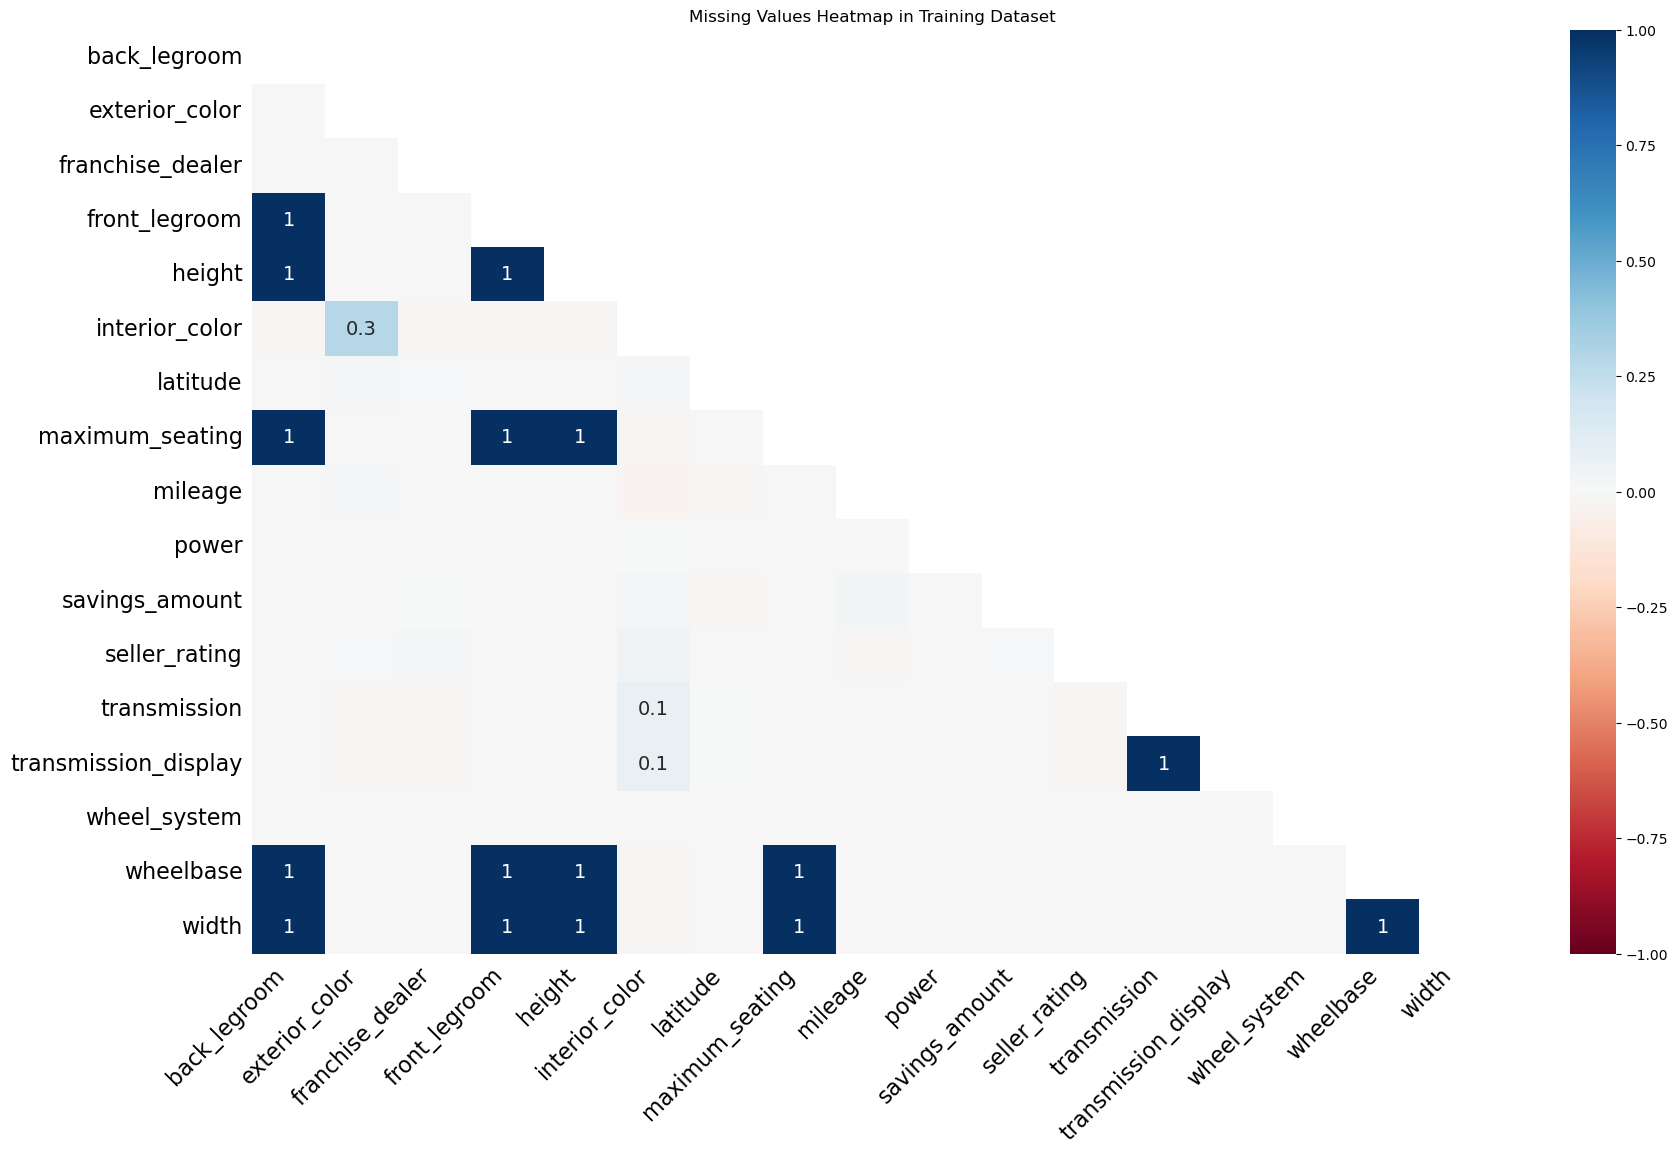

<Figure size 1000x600 with 0 Axes>

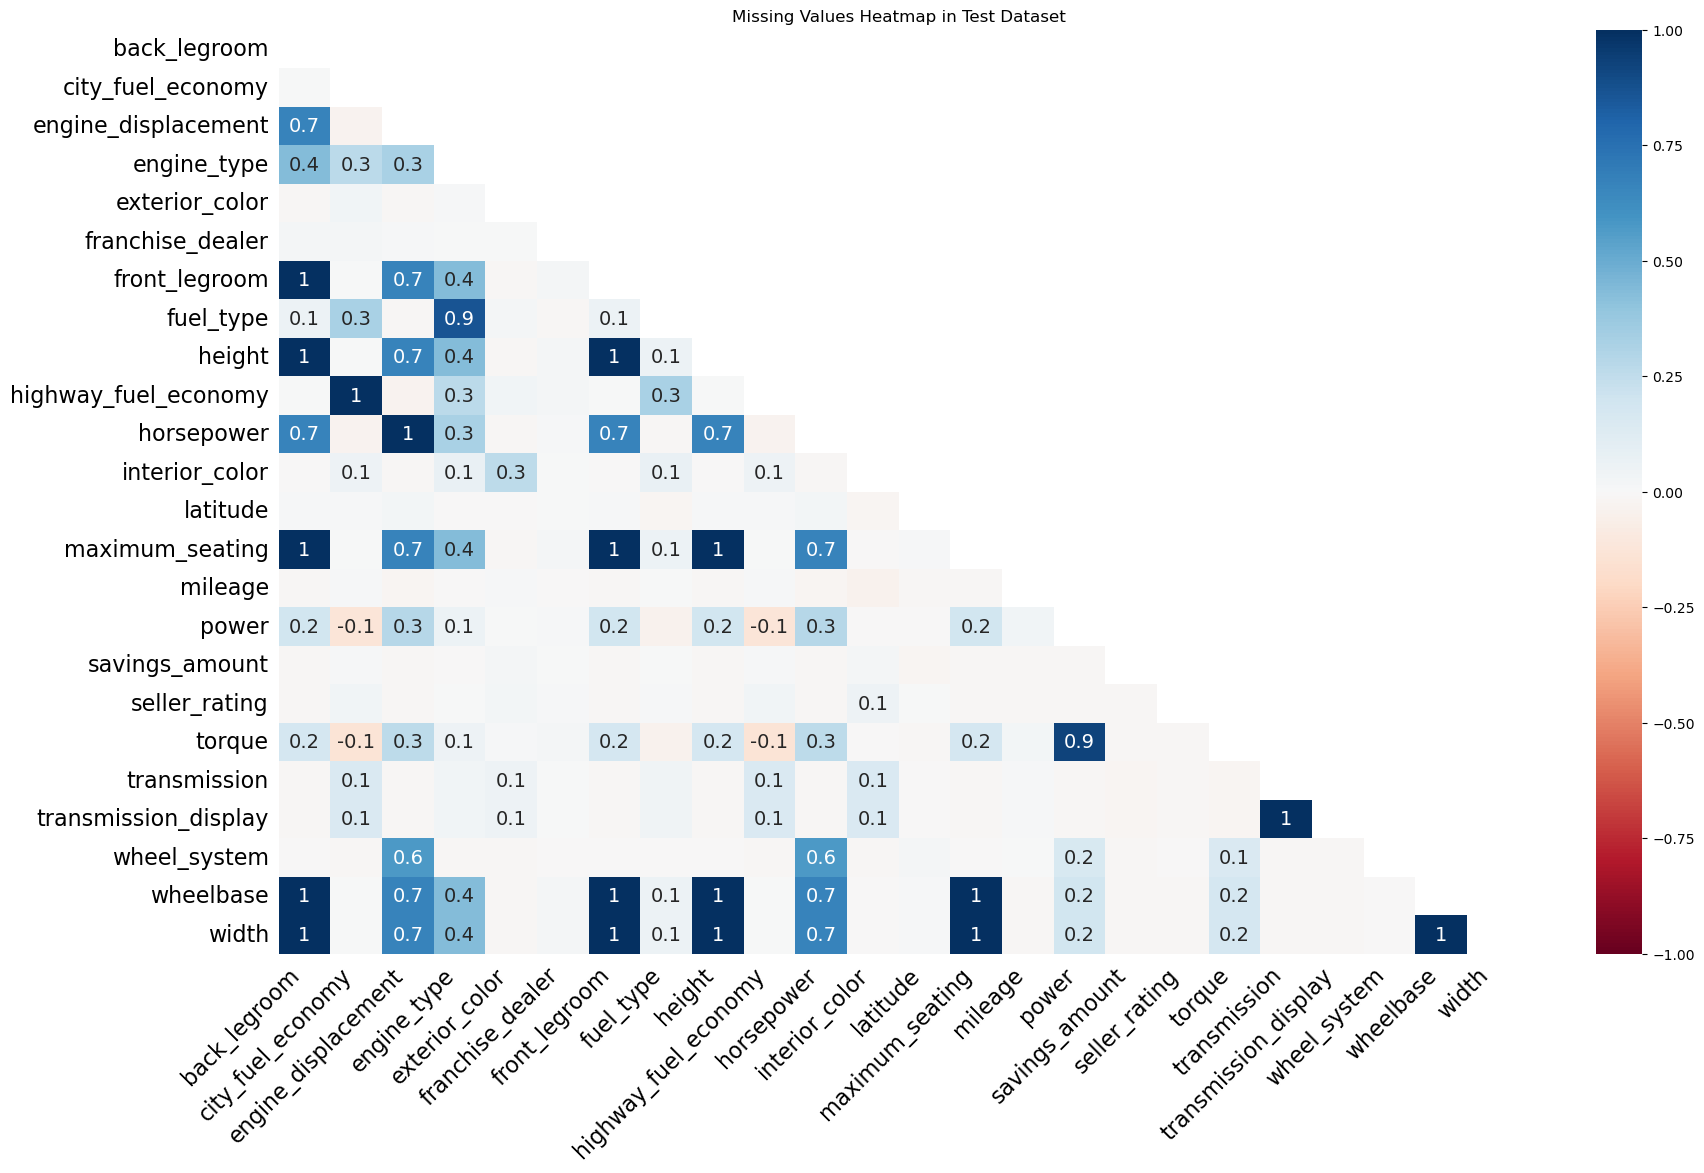

In [12]:

# Visualize missing values heatmap for training dataset
plt.figure(figsize=(10, 6))
msno.heatmap(train_df)
plt.title('Missing Values Heatmap in Training Dataset')
plt.show()

# Visualize missing values heatmap for test dataset
plt.figure(figsize=(10, 6))
msno.heatmap(test_df)
plt.title('Missing Values Heatmap in Test Dataset')
plt.show()

In [13]:
summary_stats = train_df.describe()
summary_stats

,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,savings_amount,seller_rating,year,price
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,7861.000000,8000.000000,7669.000000,7879.000000,7901.000000,8000.000000,8000.000000
mean,21.382250,76.505750,50482.170125,2919.187500,28.546750,247.275250,36.967708,-90.522819,31499.723041,559.145450,4.263310,2017.718250,29018.586125
std,4.825769,105.707208,27232.711121,1225.838866,5.623479,88.329125,5.039947,13.795014,44027.277664,954.966587,0.523339,3.635763,17479.244599
min,10.000000,0.000000,1060.000000,1000.000000,13.000000,74.000000,24.571900,-123.401000,0.000000,0.000000,1.000000,1988.000000,1700.000000
25%,18.000000,15.000000,30012.750000,2000.000000,24.000000,175.000000,33.494500,-96.882200,7.000000,0.000000,4.000000,2017.000000,17980.000000
50%,21.000000,36.000000,48053.500000,2500.000000,28.000000,245.000000,37.962500,-87.020800,12225.000000,0.000000,4.333333,2019.000000,25591.000000
75%,25.000000,82.000000,76303.750000,3500.000000,32.000000,300.000000,40.981700,-80.611100,44876.000000,833.500000,4.605263,2020.000000,37221.750000
max,70.000000,1259.000000,99362.000000,6600.000000,75.000000,717.000000,48.861600,-67.997400,283408.000000,12977.000000,5.000000,2021.000000,314900.000000


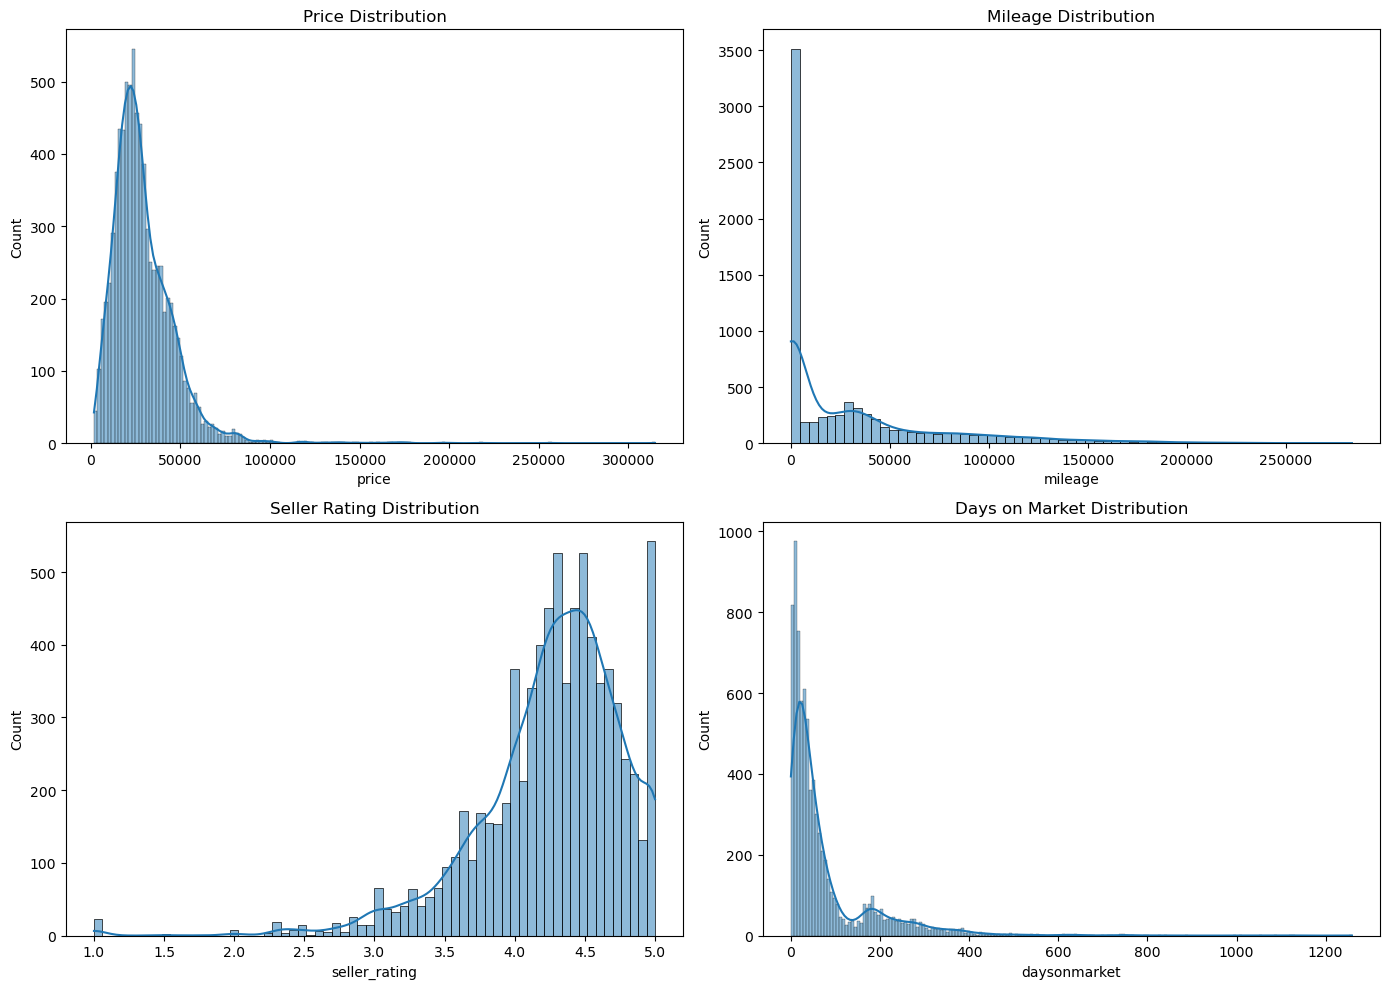

In [14]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(train_df['price'], kde=True)
plt.title('Price Distribution')

plt.subplot(2, 2, 2)
sns.histplot(train_df['mileage'], kde=True)
plt.title('Mileage Distribution')

plt.subplot(2, 2, 3)
sns.histplot(train_df['seller_rating'], kde=True)
plt.title('Seller Rating Distribution')

plt.subplot(2, 2, 4)
sns.histplot(train_df['daysonmarket'], kde=True)
plt.title('Days on Market Distribution')

plt.tight_layout()
plt.show()

*1. Forecasting Problem*

`The goal of this task is to be able to predict the resale price of used cars based on an array of vehicle and market specific features. In the real world, accurate price forecasting is extremely valuable for both the consumer and the business. Businesses and dealerships use the forecasts to optimize inventory turnover, create pricing strategies, and maximize profits while the consumers will be able to get a fair pricing on the vehicles. They will also be able to invest wisely based on the prediction.`

*2. Evaluation Criteria*

`To make sure how good our price predictions are, we use a measure called Root Mean Squared Error (RMSE). RMSE is a way to calculate how far off our predictions are from the actual prices, with bigger mistakes counting more heavily. This means that if the model predicts a few car prices very badly, it will get penalized a lot, making this a strict and fair evaluation. A lower RMSE means that our model is predicting closer to the actual prices, which is what we’re aiming for.`

*3. Variable Categorization*

`The data we have contains different types of information about each car. Here’s how we grouped them:`

**Numerical:** `Things like mileage, price, horsepower, etc., which are straightforward quantities.`

**Categorical:** `These are groups or types, like make, model, color, and transmission type.`

**Binary/Booloean:** `For example, franchise_dealer shows if a car is sold by a dealership (True or False), and is_new indicates if the car is new or used. These simple yes/no values help us understand differences, like the effect of being a dealership car or a new car on price.`

*4. Missing Values*

`Both the training (used to create the model) and test (used to evaluate the model) datasets have some missing information. For example, some cars are missing data in fields like back_legroom and interior_color. Visualizations showed us which columns have missing values and how many. `

`Train: 2061
Test: 3442`

*5. Univariate Data Characteristics*

**Price:** `Most cars are priced lower, with a few expensive ones. This pattern is skewed which basically means that there are a lot more low-priced cars than high-priced ones. Adjusting for this in the model could help improve its predictions.`

**Mileage:** `Like price, mileage is also skewed, with most cars having lower mileage. Lower mileage often means a car is newer or has been used less, which typically makes it more valuable.`

**Seller Rating:** `This shows how sellers are rated, usually on a scale up to 5. Most ratings are high, which could influence a buyer’s confidence in the seller.`

**Days on Market:** `This tells us how long cars stay listed before they’re sold. Most cars don’t take too long to sell, but a few take much longer. The longer a car stays unsold, the more likely its price may be reduced.`

---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering

- **Make sure you explain what you have done and why in Markdown text for each question, as well as on your video**.

**Total Marks: 9**

Student in charge of this task: `Jaden Greenway`

**Task 2, Question 1**: Clean **all** numerical features so that they can be used in training algorithms. For instance, back_legroom feature is in object format containing both numerical values and text. Extract numerical values (equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

In [20]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Function to handle different cases in string columns robustly, including stripping spaces and handling invalid entries
def clean_string_column_robust(column):
    if column.dtype == 'object':
        return column.str.extract(r'(\d+\.\d+|\d+)').astype(float)  # Extract numeric part and ignore invalid formats
    return column  # Return the column as is if it's not a string


train_df = pd.read_csv("/Users/jpsalmon/Desktop/2024-2/APA 2024-2/Group Assignment/busa-competition/train.csv")
test_df = pd.read_csv("/Users/jpsalmon/Desktop/2024-2/APA 2024-2/Group Assignment/busa-competition/test.csv")

# Define the columns that need cleaning
columns_to_clean = ['back_legroom', 'front_legroom', 'height', 'wheelbase', 'width', 'maximum_seating']

# Apply the robust cleaning function to the relevant columns in both train and test datasets
for column in columns_to_clean:
    train_df[column] = clean_string_column_robust(train_df[column])
    test_df[column] = clean_string_column_robust(test_df[column])

# Check the first few rows after cleaning to see if NaN issue is resolved
train_df[columns_to_clean].head()

,back_legroom,front_legroom,height,wheelbase,width,maximum_seating
0,34.6,41.8,71.1,109.8,75.2,7.0
1,40.3,41.1,65.7,106.2,73.2,5.0
2,34.7,43.9,57.8,112.2,69.8,5.0
3,40.4,41.3,66.5,104.7,73.0,5.0
4,43.4,44.5,75.5,147.4,81.2,6.0


`Here, we cleaned and converted specific columns in the train and test datasets from strings to numeric values. First, we defined a function clean_string column_robust to extract numeric values from string-type columns containing mixed content. Then, we applied this function to columns like 'back_legroom', 'front_legroom', 'height', 'wheelbase', 'width', and 'maximum_seating' in both datasets. This conversion ensures that the columns, which may contain numerical data embedded in strings, are properly formatted as float type for accurate analysis and modeling. Finally, we printed the cleaned columns to verify the changes.`

**Task 2, Question 2** Create at least 5 new features from the existing numerical variables which contain multiple items of information, for example you could extract maximum torque and torque rpm from the torque variable.  
(2 marks)

In [23]:
# Define a function to split the "torque" column into two new features: "max_torque" and "torque_rpm"
def extract_torque_features(df):
    # Extract the numerical part of torque (before 'lb-ft') and RPM (after '@')
    df['max_torque'] = df['torque'].str.extract(r'(\d+)').astype(float)
    df['torque_rpm'] = df['torque'].str.extract(r'@ (\d+)').astype(float) #in thousands 
    return df

# Define a function to split the "power" column into two new features: "max_power" and "power_rpm"
def extract_power_features(df):
    # Extract the numerical part of power (before 'hp') and RPM (after '@')
    df['max_power'] = df['power'].str.extract(r'(\d+)').astype(float)
    df['power_rpm'] = df['power'].str.extract(r'@ (\d+)').astype(float)
    return df

# Define a function to extract the number of gears from the "transmission_display" column
def extract_gears(df):
    # Extract the number of gears (e.g., 9-Speed -> 9)
    df['num_gears'] = df['transmission_display'].str.extract(r'(\d+)-Speed').astype(float)
    return df

# Apply the feature extraction functions to the train and test datasets
train_df = extract_torque_features(train_df)
train_df = extract_power_features(train_df)
train_df = extract_gears(train_df)

test_df = extract_torque_features(test_df)
test_df = extract_power_features(test_df)
test_df = extract_gears(test_df)
train_df['car_age'] = 2020 - train_df['year']
test_df['car_age'] = 2020 - test_df['year']

# Check the new features added to the train dataset
new_columns = ['max_torque', 'torque_rpm', 'max_power', 'power_rpm', 'num_gears', 'car_age']
train_df[new_columns].head()

,max_torque,torque_rpm,max_power,power_rpm,num_gears,car_age
0,266.0,4.0,236.0,5.0,NaN,11
1,239.0,4.0,271.0,6.0,9.0,1
2,269.0,5.0,328.0,7.0,NaN,8
3,179.0,2.0,190.0,5.0,NaN,0
4,460.0,1.0,277.0,3.0,NaN,0


In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vin                   8000 non-null   object 
 1   back_legroom          7840 non-null   float64
 2   body_type             8000 non-null   object 
 3   city                  8000 non-null   object 
 4   city_fuel_economy     8000 non-null   float64
 5   daysonmarket          8000 non-null   int64  
 6   dealer_zip            8000 non-null   int64  
 7   engine_displacement   8000 non-null   float64
 8   engine_type           8000 non-null   object 
 9   exterior_color        7883 non-null   object 
 10  franchise_dealer      7898 non-null   object 
 11  front_legroom         7948 non-null   float64
 12  fuel_type             8000 non-null   object 
 13  height                7993 non-null   float64
 14  highway_fuel_economy  8000 non-null   float64
 15  horsepower           

`We created 6 new features from the existing numerical variables in the train and test datasets. First, we extracted max_torque and torque_rpm (in '000s) from the torque column using extract_torque_features to handle different formatting styles and converted these values to floats. Next, we converted the power column to floats and extracted the maximum power and maximum RPM values. After which we extracted the number of gears using the transmission_display feature in the dataset. And lastly, we calculated the car's age by subtracting the manufacturing year from the current year which based on the listed_date and days_on_market, we figured it out to be 2020.`

**Task 2, Question 3**: Impute the missing values for all features in both the training and test datasets.   
(2 marks)

In [27]:
# Identify numerical and categorical columns
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = train_df.select_dtypes(include=['object', 'bool']).columns

# Exclude 'price' from numerical columns for the test dataset
numerical_cols = numerical_cols.drop('price', errors='ignore')
categorical_cols = categorical_cols.drop('vin', errors='ignore')

# Function to impute missing values
def impute_missing_values(train, test, numerical_cols, categorical_cols):
    # Impute numerical columns
    num_imputer = SimpleImputer(strategy='mean')
    train[numerical_cols] = num_imputer.fit_transform(train[numerical_cols])
    test[numerical_cols] = num_imputer.transform(test[numerical_cols])
    
    # Impute categorical columns
    cat_imputer = SimpleImputer(strategy='most_frequent')
    train[categorical_cols] = cat_imputer.fit_transform(train[categorical_cols])
    test[categorical_cols] = cat_imputer.transform(test[categorical_cols])
    
    return train, test

# Apply imputation to both train and test datasets
train_df, test_df = impute_missing_values(train_df, test_df, numerical_cols, categorical_cols)

# Verify imputation by checking for any remaining missing values
print("Missing values in training data after imputation:")
print(train_df.isnull().sum().sum())

print("Missing values in test data after imputation:")
print(test_df.isnull().sum().sum())

Missing values in training data after imputation:
0
Missing values in test data after imputation:
0


`We identified and separated the categorical and numerical variables. We excluded the price column as it is the target variable. We utilized the SimpleImputer for both. The numerical columns with the strategy parameter set to "mean" and the "most_frequent" strategy for categorical columns to handle missing values. After imputation, we verified that there were no remaining missing values in both the training and test datasets.`

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 

- Where multiple values are given for an observation encode the observation as 'other'. 
- Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately. For instance, if appropriate, you could all map colours into {red, yellow, green, blue, purple, other} and then encode.  
(2 marks)

In [30]:
import pandas as pd

# Function to encode categorical variables with 'other' category handling and limiting to top 5 most frequent values
def encode_categorical_features_with_dummies(train, test, categorical_cols, threshold=5):
    for col in categorical_cols:
        # Get the most frequent categories in the column (top 5 + 'other')
        top_categories = train[col].value_counts().nlargest(threshold).index.tolist()
        
        # Replace any category not in top 5 with 'other'
        train[col] = train[col].apply(lambda x: x if x in top_categories else 'other')
        test[col] = test[col].apply(lambda x: x if x in top_categories else 'other')
    
    # Apply pd.get_dummies to the modified categorical columns
    train_encoded = pd.get_dummies(train[categorical_cols], drop_first=True)
    test_encoded = pd.get_dummies(test[categorical_cols], drop_first=True)

    # Ensure both train and test have the same dummy columns
    train_encoded, test_encoded = train_encoded.align(test_encoded, join='outer', axis=1, fill_value=0)
    
    # Drop original categorical columns and concatenate encoded columns
    train = train.drop(categorical_cols, axis=1).join(train_encoded)
    test = test.drop(categorical_cols, axis=1).join(test_encoded)

    return train, test


# Identify categorical columns (excluding 'vin' and 'price')
categorical_cols = train_df.select_dtypes(include=['object', 'bool']).columns.drop(['vin', 'price'], errors='ignore')

# Encode the categorical variables
train_df, test_df = encode_categorical_features_with_dummies(train_df, test_df, categorical_cols)


`The encoding above sets up categorical data for modeling by transforming it into a format usable by machine learning models. First, it identifies the top 5 most frequent categories for each categorical column and label them, and less frequent categories as “other.” Then, it uses 'pd.get_dummies' to convert each distinct category in these columns into separate binary (0 or 1) columns. This approach makes categorical data numeric, allowing models to work with it. To ensure consistency, it aligns the train and test datasets so they have the same dummy columns. Finally, it replaces the original categorical columns with these new encoded columns.`

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

In [33]:
# Retain the 'vin' column
vin_train = train_df['vin']
vin_test = test_df['vin']

# Identify numerical columns for normalization
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop('price', errors='ignore')  # Exclude 'price' from the numerical columns

# Normalize numerical features using StandardScaler
scaler = StandardScaler()
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

# Retain the 'vin' column in the cleaned training data and test data
train_df['vin'] = vin_train.iloc[train_df.index].values
test_df = test_df.copy()  # Assuming we don't remove outliers from the test set
test_df['vin'] = vin_test.values

`We retain the vin column from both datasets as we have to use it later to test the model. We then prepare the data for normalization by selecting the numerical columns excluding the 'price' column. We then use StandardScaler() for normalization to bring the data to a common scale and to have a mean of zero and unit variance, which helps many machine learning models perform better. Finally the 'vin' column is added again to both the training and test datasets.`

--- 
## Task 3: Fit and tune a forecasting model, submit predictions & win competition

**Total Marks: 9**

For this task, you should not create any new features and must rely on the variables constructed in Task 2.  
 

1. Perform some EDA to measure the relationship between the features and the target variable, and carefully explain your findings. (2 marks)

2. Choose and carefully explain 3 different machine learning (ML) regression models that you will apply in this competition. (2 marks)
   
3. Train the models and tune their hyperparameters via cross-validation. Discuss the fitted weights, optimised hyperparameter values, and their training dataset predictive performance. (2 marks)   

4. Select your best model, create predictions of the test dataset and submit your forecasts on Kaggle's competition page. Provide Kaggle ranking and score (screenshots) and comment on your performance in the competition. (2 marks)

5. Suggest ways to improve your ranking and implement them, providing further evidence from Kaggle (screenshots). (1 mark)   

- Hints:
    - Make sure your Python code works so that your results can be replicated by the marker
    - You will receive the mark of zero for this Task if your code does not produce the forecasts uploaded to Kaggle
    - Make sure you clearly explain each step you do both in Markdown and on the recoded video  



Student in charge of this task: `Juan Pablo Salmon`

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [38]:
# Select numeric columns for correlation analysis
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Get the correlation of all features with the target variable 'price'
corr_with_price = correlation_matrix['price'].sort_values(ascending=False)

# Select the top 5 most correlated features excluding 'price'
top_correlated_features = corr_with_price.index[1:6].tolist()

# Print the top correlated features
print("Top 5 most correlated features with price:")
print(top_correlated_features)

Top 5 most correlated features with price:
['horsepower', 'max_torque', 'max_power', 'year', 'width']


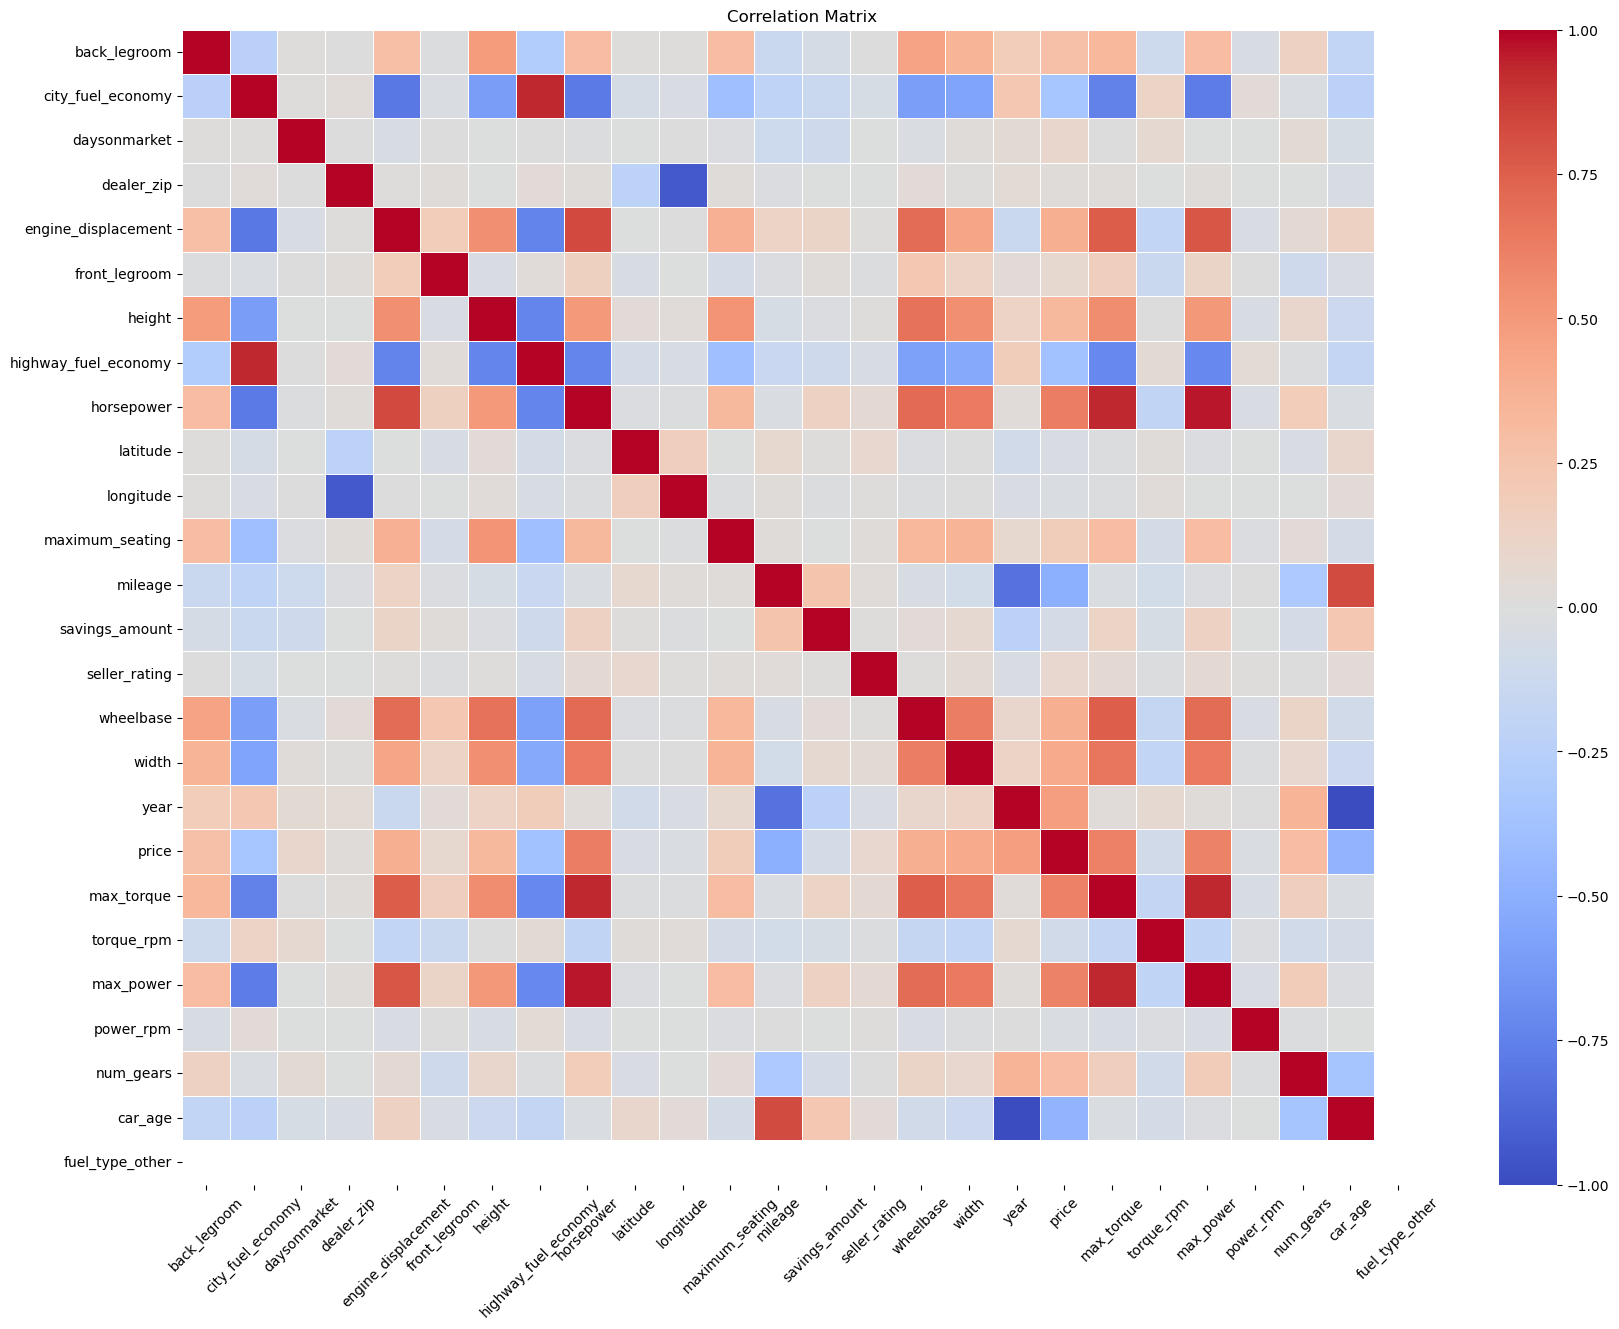

In [39]:
# Identify numerical columns including the target variable 'price', excluding 'vin'
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop('vin', errors='ignore')

# Compute the correlation matrix
correlation_matrix = train_df[numerical_cols].corr()

# Increase the figure size and set a higher resolution for the heatmap
plt.figure(figsize=(20, 15), dpi=100)
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)


# Show the plot
plt.show()

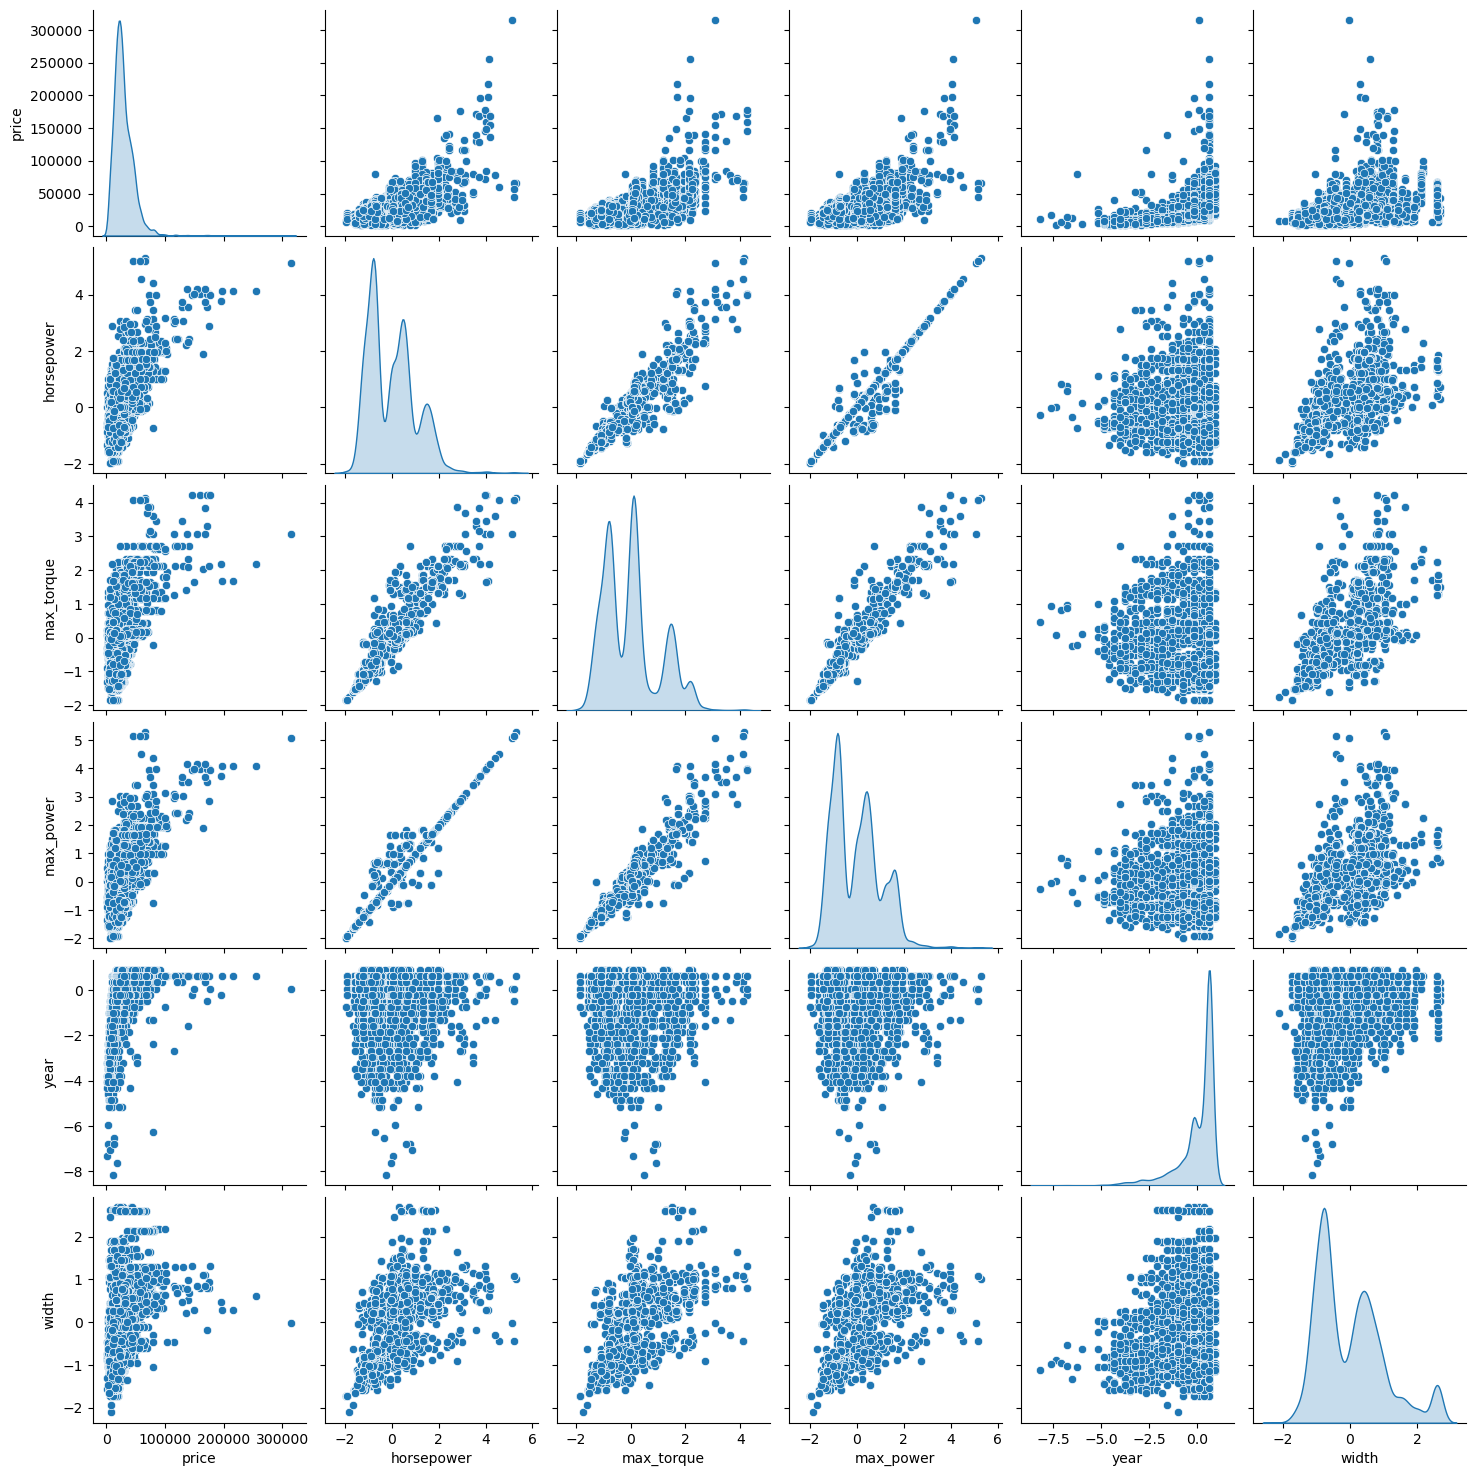

In [40]:
# Select a subset of features for pair plotting
features_to_plot = ['price', 'horsepower', 'max_torque', 'max_power', 'year', 'width']

# Create pair plots
sns.pairplot(train_df[features_to_plot], diag_kind='kde')
plt.show()

`We begin by conducting exploratory data analysis (EDA) to identify the features most strongly correlated with price. The top five features that stand out are horsepower, max torque, max power, year, and width. To better understand the relationships between these variables and price, we first visualize the correlation of power with all numerical features, excluding the VIN. While a heatmap offers a useful overview, pair plots allow for a more nuanced, detailed view. For this reason, we focus on the top five features when creating the pair plots. The plots confirm a positive correlation between price and horsepower, max torque, and max power.`

In [42]:
# Check available columns in the encoded train dataset
print(train_df.columns)

Index(['vin', 'back_legroom', 'city_fuel_economy', 'daysonmarket',
       'dealer_zip', 'engine_displacement', 'front_legroom', 'height',
       'highway_fuel_economy', 'horsepower', 'latitude', 'longitude',
       'maximum_seating', 'mileage', 'savings_amount', 'seller_rating',
       'wheelbase', 'width', 'year', 'price', 'max_torque', 'torque_rpm',
       'max_power', 'power_rpm', 'num_gears', 'car_age', 'body_type_Minivan',
       'body_type_Pickup Truck', 'body_type_SUV / Crossover',
       'body_type_Sedan', 'body_type_other', 'city_Houston', 'city_Miami',
       'city_San Antonio', 'city_Tampa', 'city_other', 'engine_type_I4',
       'engine_type_V6', 'engine_type_V6 Flex Fuel Vehicle', 'engine_type_V8',
       'engine_type_other', 'exterior_color_Gray', 'exterior_color_Silver',
       'exterior_color_Summit White', 'exterior_color_White',
       'exterior_color_other', 'franchise_dealer', 'fuel_type_Diesel',
       'fuel_type_Flex Fuel Vehicle', 'fuel_type_Gasoline', 'fuel_type

In [43]:
feature_list = [
'back_legroom', 'city_fuel_economy', 'daysonmarket',
       'dealer_zip', 'engine_displacement', 'front_legroom', 'height',
       'highway_fuel_economy', 'horsepower', 'latitude', 'longitude',
       'maximum_seating', 'mileage', 'savings_amount', 'seller_rating',
       'wheelbase', 'width', 'year', 'max_torque', 'torque_rpm',
       'max_power', 'power_rpm', 'num_gears', 'body_type_Minivan',
       'body_type_Pickup Truck', 'body_type_SUV / Crossover',
       'body_type_Sedan', 'body_type_other', 'city_Houston', 'city_Miami',
       'city_San Antonio', 'city_Tampa', 'city_other', 'engine_type_I4',
       'engine_type_V6', 'engine_type_V6 Flex Fuel Vehicle', 'engine_type_V8',
       'engine_type_other', 'exterior_color_Gray', 'exterior_color_Silver',
       'exterior_color_Summit White', 'exterior_color_White',
       'exterior_color_other', 'franchise_dealer', 'fuel_type_Diesel',
       'fuel_type_Flex Fuel Vehicle', 'fuel_type_Gasoline', 'fuel_type_Hybrid',
       'fuel_type_other', 'interior_color_Black (Charcoal)',
       'interior_color_Black (Ebony)', 'interior_color_Gray',
       'interior_color_Jet Black', 'interior_color_other', 'is_new',
       'listed_date_2020-09-02', 'listed_date_2020-09-03',
       'listed_date_2020-09-04', 'listed_date_2020-09-05', 'listed_date_other',
       'listing_color_GRAY', 'listing_color_SILVER', 'listing_color_UNKNOWN',
       'listing_color_WHITE', 'listing_color_other', 'make_name_Ford',
       'make_name_Honda', 'make_name_Jeep', 'make_name_Nissan',
       'make_name_other', 'model_name_F-150', 'model_name_Rogue',
       'model_name_Silverado 1500', 'model_name_Trax', 'model_name_other',
       'power_170 hp @ 6,000 RPM', 'power_355 hp @ 5,600 RPM',
       'power_395 hp @ 5,600 RPM', 'power_395 hp @ 5,750 RPM', 'power_other',
       'torque_175 lb-ft @ 4,400 RPM', 'torque_383 lb-ft @ 4,100 RPM',
       'torque_400 lb-ft @ 4,500 RPM', 'torque_410 lb-ft @ 3,950 RPM',
       'torque_other', 'transmission_CVT', 'transmission_Dual Clutch',
       'transmission_M', 'transmission_display_8-Speed Automatic',
       'transmission_display_9-Speed Automatic',
       'transmission_display_Automatic',
       'transmission_display_Continuously Variable Transmission',
       'transmission_display_other', 'wheel_system_4X2', 'wheel_system_AWD',
       'wheel_system_FWD', 'wheel_system_RWD'
]
selected_features_train = train_df[feature_list]
selected_features_test = test_df[feature_list]

In [44]:
# Adjust the feature list based on actual columns present
available_features = [col for col in feature_list if col in train_df.columns]

# Select only these features from the train and test datasets
selected_features_train = train_df[available_features]
selected_features_test = test_df[available_features]

# Display the first few rows of the selected features
print(selected_features_train.head())
print(selected_features_test.head())

   back_legroom  city_fuel_economy  daysonmarket  dealer_zip  \
0     -1.072312          -1.115384     -0.383212    0.643598   
1      0.745726           0.128019      3.306455    0.420691   
2     -1.040417          -0.700917     -0.676493   -1.040438   
3      0.777621           1.164188     -0.515662    0.342214   
4      1.734483          -1.115384     -0.184538    0.915127   

   engine_displacement  front_legroom    height  highway_fuel_economy  \
0             0.881747      -0.248058  0.829373             -1.519928   
1            -0.423563      -0.715777  0.036604              0.436279   
2             0.637002       1.155098 -1.123187             -0.630743   
3            -1.157800      -0.582143  0.154051              0.614116   
4             2.676549       1.556000  1.475332             -1.164254   

   horsepower  latitude  ...  transmission_M  \
0   -0.127658  0.911211  ...           False   
1   -0.761691  0.499052  ...           False   
2    0.913966  0.357169  ...    

`After analyzing the dataset, we select all features except price and VIN for training three distinct machine learning models aimed at predicting used car prices.`

In [46]:
# Assuming that 'price' is the target variable in train dataset
target_train = train_df['price']

# Create a Linear Regression object
lr = LinearRegression()

# Train the model using the training sets
lr.fit(selected_features_train, target_train)

# Now that the model is trained, we can make predictions
price_predictions = lr.predict(selected_features_test)

In [47]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# Predictions on the training data
y_pred_train = lr.predict(selected_features_train)

# Calculate the R² score on the training set
train_r2 = r2_score(target_train, y_pred_train)
print(f"Training R² Score: {train_r2}")

# Calculate MAPE on the training set
train_mape = mean_absolute_percentage_error(target_train, y_pred_train)
print(f"Training MAPE: {train_mape}")

Training R² Score: 0.7520275338212457
Training MAPE: 0.26411276409848894


`First, we implement a Linear Regression model using these selected features. The model is trained on the dataset, and predictions are made for both the training and test sets. The training R² score, which represents the proportion of variance in car prices explained by the model, comes out to 0.752. This means that approximately 75.2% of the variability in car prices is captured by the model, indicating a reasonable fit. However, the Mean Absolute Percentage Error (MAPE) score is 26.4%, highlighting that the model’s predictions are off by about 26.4%, making the model somewhat unreliable though still functional for price prediction.`

In [49]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Cross-validation score
cv_scores_rf = cross_val_score(rf, selected_features_train, target_train, cv=5, scoring='r2')
print(f"Random Forest Cross-Validation R² Score: {cv_scores_rf.mean()}")

# Train the model
rf.fit(selected_features_train, target_train)

# Predict on the test set
price_predictions_rf = rf.predict(selected_features_test)

# Evaluate the model on the training set for R²
train_r2_rf = r2_score(target_train, rf.predict(selected_features_train))
print(f"Random Forest Training R² Score: {train_r2_rf}")

# Calculate MAPE on the training set
train_mape_rf = mean_absolute_percentage_error(target_train, rf.predict(selected_features_train))
print(f"Random Forest Training MAPE: {train_mape_rf}")

Random Forest Cross-Validation R² Score: 0.8941000193792726
Random Forest Training R² Score: 0.9866316362006334
Random Forest Training MAPE: 0.04425429754430459


`Next, we employ a Random Forest model, validating it through 5-fold cross-validation. This approach yields an average R² score of 0.894, demonstrating the model’s strong predictive capabilities. When trained on the full dataset, the model achieves an impressive R² score of 0.987, indicating near-perfect fit with only a 4.4% absolute percentage error. These results highlight the Random Forest model as highly efficient in capturing the variability in car prices.`

In [51]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# Initialize the model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Cross-validation score
cv_scores_gb = cross_val_score(gb, selected_features_train, target_train, cv=5, scoring='r2')
print(f"Gradient Boosting Cross-Validation R² Score: {cv_scores_gb.mean()}")

# Train the model
gb.fit(selected_features_train, target_train)

# Predict on the test set
price_predictions_gb = gb.predict(selected_features_test)

# Evaluate the model on the training set for R²
train_r2_gb = r2_score(target_train, gb.predict(selected_features_train))
print(f"Gradient Boosting Training R² Score: {train_r2_gb}")

# Calculate MAPE on the training set
train_mape_gb = mean_absolute_percentage_error(target_train, gb.predict(selected_features_train))
print(f"Gradient Boosting Training MAPE: {train_mape_gb}")

Gradient Boosting Cross-Validation R² Score: 0.8789631877407477
Gradient Boosting Training R² Score: 0.9226515638398184
Gradient Boosting Training MAPE: 0.13924076225799853


`We also train a Gradient Boosting model, which, after 5-fold cross-validation, achieves an average R² score of 0.879, showing strong generalization capabilities. Once fully trained, the model attains a training R² score of 0.923 and a MAPE of 13.9%, demonstrating a solid fit. `

In [53]:
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='r2', n_jobs=-1)

# Fit GridSearchCV
grid_search_rf.fit(selected_features_train, target_train)

# Best parameters and score
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best Cross-Validation R² Score for Random Forest: {grid_search_rf.best_score_}")

# Predict with best estimator
best_rf = grid_search_rf.best_estimator_
price_predictions_best_rf = best_rf.predict(selected_features_test)

# Evaluate the best model on the training set
train_r2_best_rf = r2_score(target_train, best_rf.predict(selected_features_train))
print(f"Best Random Forest Training R² Score: {train_r2_best_rf}")

# Calculate MAPE on the training set
train_mape_rf = mean_absolute_percentage_error(target_train, rf.predict(selected_features_train))
print(f"Random Forest Training MAPE: {train_mape_rf}")

Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation R² Score for Random Forest: 0.8943045398856903
Best Random Forest Training R² Score: 0.9858848022279451
Random Forest Training MAPE: 0.04425429754430459


In [54]:
# Define parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='r2', n_jobs=-1)

# Fit GridSearchCV
grid_search_gb.fit(selected_features_train, target_train)

# Best parameters and score
print(f"Best Parameters for Gradient Boosting: {grid_search_gb.best_params_}")
print(f"Best Cross-Validation R² Score for Gradient Boosting: {grid_search_gb.best_score_}")

# Predict with best estimator
best_gb = grid_search_gb.best_estimator_
price_predictions_best_gb = best_gb.predict(selected_features_test)

# Evaluate the best model on the training set
train_r2_best_gb = r2_score(target_train, best_gb.predict(selected_features_train))
print(f"Best Gradient Boosting Training R² Score: {train_r2_best_gb}")

# Calculate MAPE on the training set
train_mape_gb = mean_absolute_percentage_error(target_train, gb.predict(selected_features_train))
print(f"Gradient Boosting Training MAPE: {train_mape_gb}")

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best Cross-Validation R² Score for Gradient Boosting: 0.898506499463536
Best Gradient Boosting Training R² Score: 0.990864500491226
Gradient Boosting Training MAPE: 0.13924076225799853


`Tuning hyperparameters for Random Forest and Gradient Boosting models using GridSearchCV will help us find the best settings based on cross-validation. While evaluating the performance using R² and MAPE metrics, comparing their accuracy and error rates on both training and test sets. Random Forest has a lower training error and slightly lower cross-validation R² compared to Gradient Boosting, which performs better during cross-validation but has a higher training error.
Gradient Boosting may overfit the training data due to its higher complexity, while Random Forest seems more balanced with slightly less overfitting. By the end of the day when submitting to Kaggle the Gradient Boosting gives us a better result. This may be because of its extremely high R² score`

In [87]:
# Assuming the best model is the best Random Forest model based on your results
final_predictions = price_predictions_best_gb

# Fix the column name and format the price values
submission = pd.DataFrame({
    'vin': test_df['vin'],
    'price': final_predictions
})

# Ensure there are no leading characters in the price column
submission['price'] = submission['price'].apply(lambda x: f'{x:.2f}')

# Save to CSV with a proper file path
submission.to_csv('/Users/jpsalmon/Desktop/2024-2/APA 2024-2/Group Assignment/busa-competition/submission7.csv', index=False)
print("Submission file created successfully.")

Submission file created successfully.


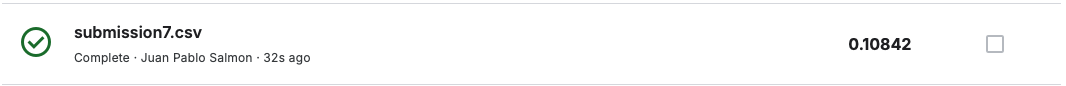

`Improving the score`

`To enhance model performance, experiment with advanced models like XGBoost, LightGBM, or CatBoost, known for their superior performance in regression tasks. These models can handle complex relationships and interactions more effectively than traditional methods. Additionally, ensemble methods, which combine predictions from multiple models, can further improve accuracy by leveraging the strengths of different algorithms.`


---
---
## Marking Criteria

To receive full marks your solutions must satisfy the following criteria:

- Problem Description: 9 marks
- Data Cleaning: 9 marks
- Building Forecasting models: 9 marks
- Video Presentation: 3 marks
    - Duration less than 15 min, presentation skill and content 
    - Each team member delivers a 5-minute presentation on their assigned task
    - All assignment questions must be discussed on video  
    - Your code must be readable on the video
    - Discuss both the actions you took and, more importantly, the reasoning behind these actions, explaining the significance of key steps
    - During the video recording, make sure that both your face and Jupyter Notebook are clearly visible
- Forecasts correctly uploaded to Kaggle
- Python code is clean and concise
- Written explanations are provided in clear and easy to understand sentences
- The assignment notebook is well-organised and easy to follow
- Failure to meet the above marking criteria will result in a deduction of marks

---
---